# Midterm (MACS 30100), February 5, 2018
### Bethany Bailey
You will have an hour and thirty minutes to take this exam.
1. Put your name in the space provided above (without the brackets).
2. Download this notebook and accompanying data `LenderDataLong.dta`.
3. The class will disconnect their wi-fi and begin taking the exam.
4. The exam is open computer, closed internet, open note.
5. Once you are done, you will signal to a TA or instructor to come over and monitor while you reconnect to the internet and upload your edited notebook to Canvas.

Remember that you must clearly indicate your answers to all questions below. We will give partial credit for partially correct answers. The midterm is worth 20 points (2 problem sets).

## The data
This two exercises of this midterm and all their respective subparts will use the `LenderData.csv` dataset, which contains observations of characteristics on short-term, high interest rate, lender information. You are not to use this data outside of this class. It is a jittered and randomized version of a dataset used in a published research paper.

Each observation contains characteristics of a particular lender location Read it into Python using the `pandas.read_csv()` command. The variables are the following:

* `avgrate`: average annualized interest rate of all loans in percentage points (235 = two hundred and thirty five percent)
* `numstores`: number of other stores owned by the same owner (measure of size)
* `defrate`: default rate on loans from that store during 2010
* `pdrad3`: number of payday lenders within a three-mile radius of the store (measure of competition)
* `pnrad3`: number of pawn lenders within a three-mile radius of the store (measure of competition)
* `totrad3`: total number of other lenders within a three-mile radius of the store (measure of competition)
* `unrt_zip`: unemployment rate in the zip code of the store
* `medtotinc2010`: median total household income in the zip code of the store
* `edbachplus_zip`: average education level in years of schooling of heads of household in the zip code of the store
* `pop_zip`: population in zip code of the store
* `mdage_zip`: median age (in years) in zip code of the store
* `pctblk2_zip`: percent of the population that is black in the zip code of the store in percentage points (2.2=two point two percent)

In [1]:
# Read in the data
import pandas as pd
df = pd.read_csv("LenderData.csv")
df.head()

,avgrate,numstores,defrate,pdrad3,pnrad3,totrad3,unrt_zip,medtotinc2010,edbachplus_zip,pop_zip,mdage_zip,pctblk2_zip
0,521.429993,23,24.390244,7,3,12,5.7,38485.44531,40.2,44821,33.6,1.0
1,521.429993,23,38.596489,15,2,18,7.1,31289.11133,14.1,68295,29.2,2.2
2,521.429993,23,38.954868,6,3,11,7.1,31289.11133,14.1,68295,29.2,2.2
3,521.429993,23,27.352297,28,29,58,9.2,31421.22266,11.3,26524,28.5,1.4
4,521.429993,23,30.055660,22,17,42,7.5,27502.00000,22.3,28936,30.8,2.7


## 1. Using the distributions of interest rates and median income (10 points)

1A) [2 points] Create a plot of the histogram of high interest rate lenders interest rates `avgrate`. Use 30 bins. Make sure to label your axes and give the figure a title. If you had to group lenders into $N$ categories, how many categories would you choose based on the interest rate data? That is, how many groupings to you see in these data?

<IPython.core.display.Javascript object>


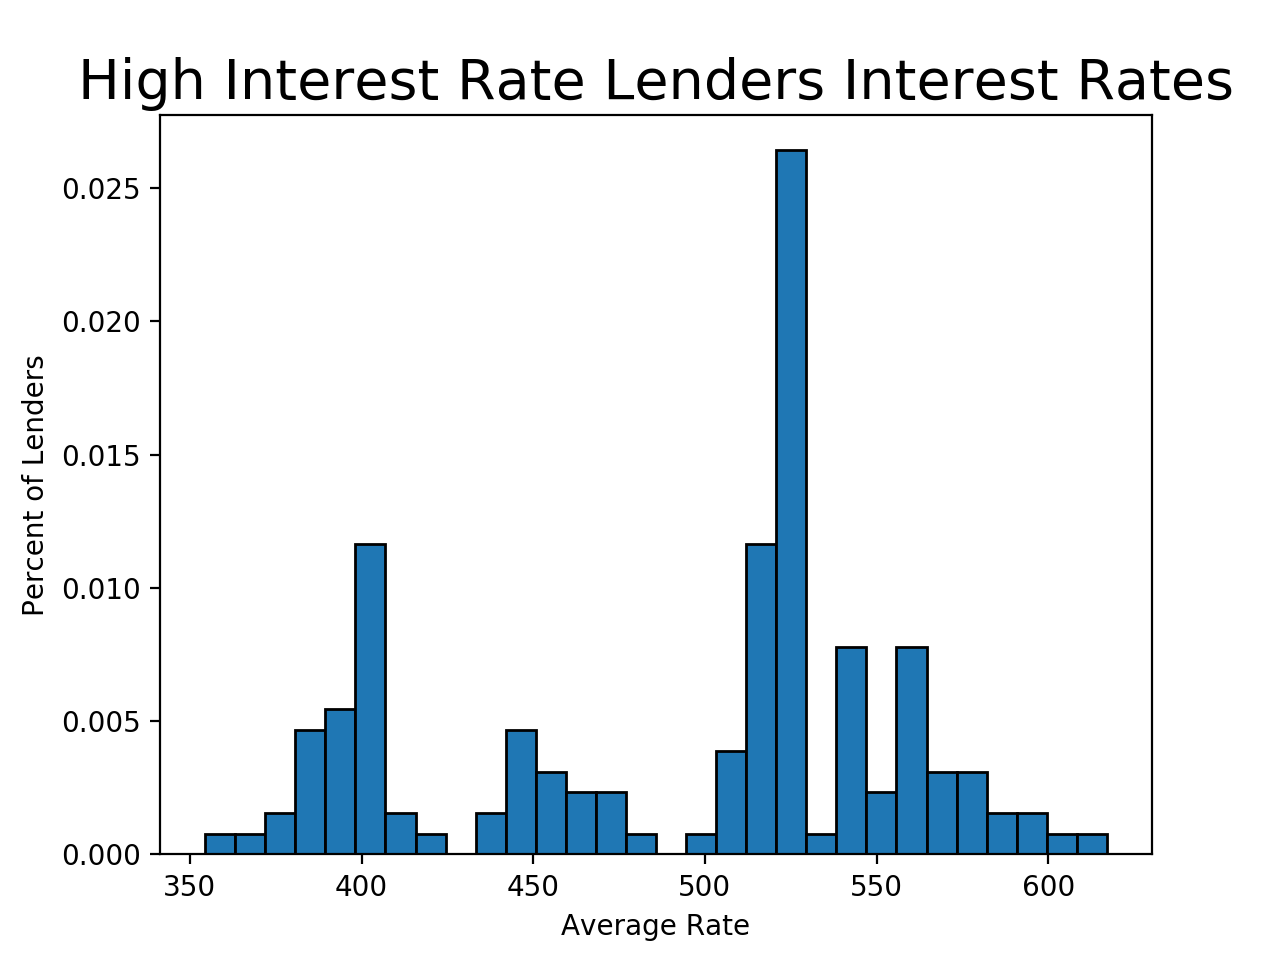

Text(0,0.5,'Percent of Lenders')

In [20]:
import matplotlib.pyplot as plt
%matplotlib notebook
count, bins, ignored = plt.hist(df.avgrate, 30, edgecolor='black', normed=True)
plt.title('High Interest Rate Lenders Interest Rates', fontsize=20)
plt.xlabel('Average Rate')
plt.ylabel('Percent of Lenders')

In [3]:
print("1A: I see three different groups in the data, so I would make N=3.")
print("These groupings are from approximately 350-425, 425-490, and 490-620.")

1A: I see three different groups in the data, so I would make N=3.
These groupings are from approximately 350-425, 425-490, and 490-620.


1B) [1 point] Create a plot of the histogram of median total household income `medtotinc2010`. Use 30 bins. Make sure to label your axes and give the figure a title.

<IPython.core.display.Javascript object>


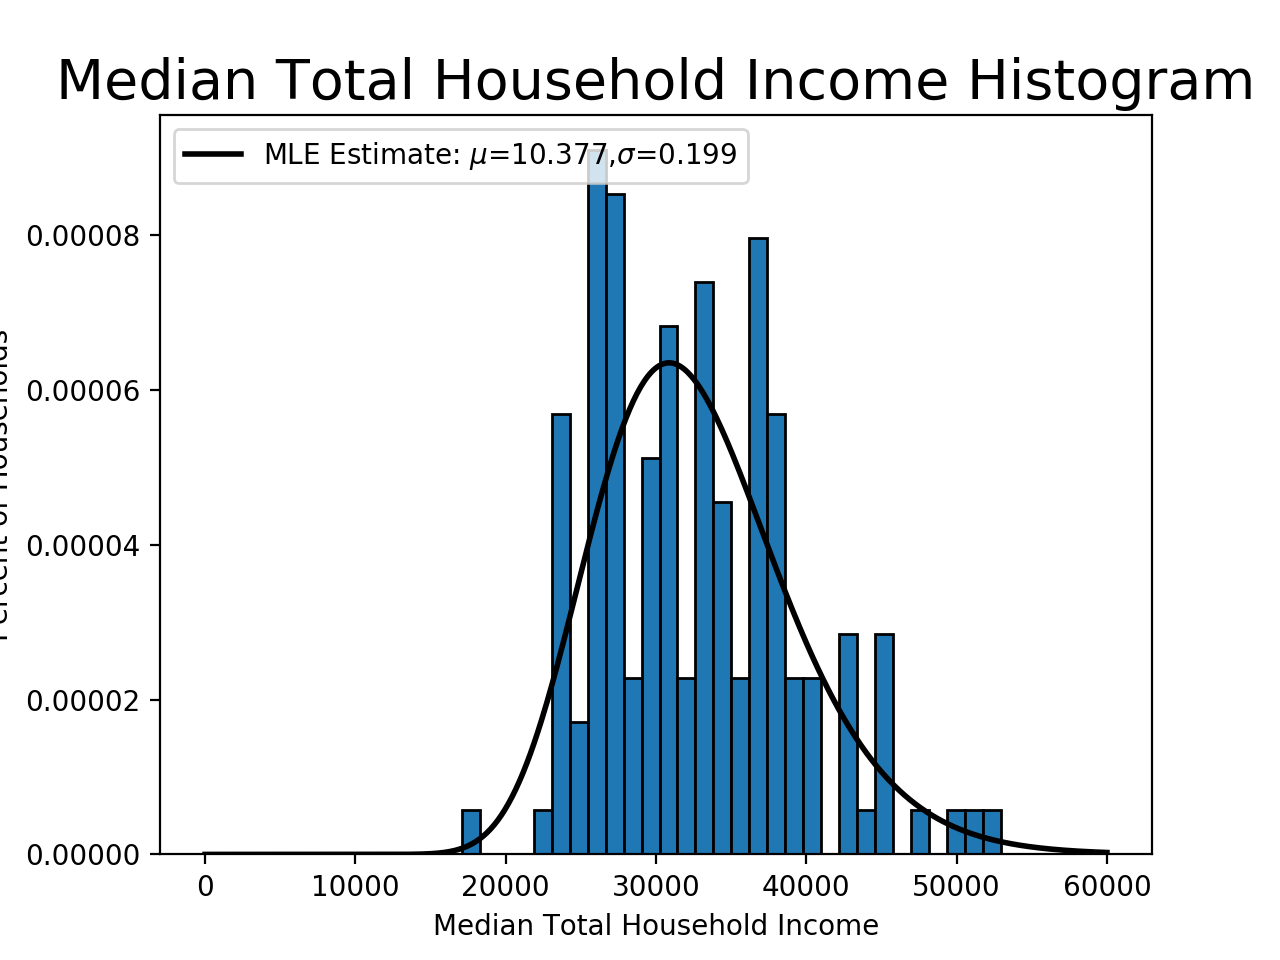

Text(0,0.5,'Percent of Households')

In [4]:
import matplotlib.pyplot as plt
%matplotlib notebook
count, bins, ignored = plt.hist(df.medtotinc2010, 30, edgecolor='black', normed=True)
plt.title('Median Total Household Income Histogram', fontsize=20)
plt.xlabel('Median Total Household Income')
plt.ylabel('Percent of Households')

1C) [5 points] Use maximum likelihood estimation to fit a lognormal distribution $LN(\mu, \sigma)$ to the median income data `medtotinc2010`. Report your estimated $\hat{\mu}_{mle}$ and $\hat{\sigma}_{mle}$ as well as the likelihood function value at the maximum (not the negative log likelihood). Report your estimate of the variance-covariance matrix of your maximum likelihood estimates of $\hat{\mu}_{mle}$ and $\hat{\sigma}_{mle}$. Report the standard error on the estimate for $\hat{\mu}_{mle}$.

In [5]:
def lognormal_pdf(xvals, mu, sigma, cutoff):
    
    if cutoff == 'None':
        prob_notcut = 1.0 - sts.norm.cdf(0, loc=mu, scale=sigma)
    else:
        prob_notcut = (sts.norm.cdf(cutoff, loc=mu, scale=sigma) -
                       sts.norm.cdf(0, loc=mu, scale=sigma))
            
    pdf_vals    = ((1/(xvals * sigma * np.sqrt(2 * np.pi)) *
                    np.exp(-(np.log(xvals)- mu)**2 / (2 * sigma**2))) /
                    prob_notcut)
    
    return pdf_vals

In [6]:
def log_lik(xvals, mu, sigma, cutoff):
    pdf_vals = lognormal_pdf(xvals, mu, sigma, cutoff)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

In [7]:
def crit(params, *args):
    mu, sigma = params
    xvals, cutoff = args
    log_lik_val = log_lik(xvals, mu, sigma, cutoff)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [8]:
import scipy.optimize as opt
import numpy as np
import scipy.stats as sts

mu_init = 10
sig_init = .2
params_init = np.array([mu_init, sig_init])
mle_args = (df.medtotinc2010, 60000)
results = opt.minimize(crit, params_init, args=(mle_args),
                       method='L-BFGS-B',
                       bounds = ((0.1, None), (0.1, None)))
mu_MLE, sig_MLE = results.x
OffDiagNeg = np.array([[1, -1], [-1, 1]])
vcv_mle = results.hess_inv.todense() * OffDiagNeg
stderr_mu_mle = np.sqrt(vcv_mle[0,0])
stderr_sig_mle = np.sqrt(vcv_mle[1,1])
print('1C: mu_MLE estimate =', mu_MLE, ' sig_MLE estimate =', sig_MLE)
print('likelihood function =', log_lik(df.medtotinc2010, mu_MLE, sig_MLE, 60000))
print('variance-covariance matrix(MLE) = ')
print(vcv_mle)
print('Standard error for mu estimate = ', stderr_mu_mle)
print('Standard error for sigma estimate = ', stderr_sig_mle)
print('This result is very sensitive to initial values and bounds.')

1C: mu_MLE estimate = 10.377380189  sig_MLE estimate = 0.19949927867
likelihood function = -1497.1030088862117
variance-covariance matrix(MLE) = 
[[  2.83662016e-04  -1.10772804e-05]
 [ -1.10772804e-05   1.45025437e-04]]
Standard error for mu estimate =  0.0168422687388
Standard error for sigma estimate =  0.0120426507534
This result is very sensitive to initial values and bounds.


1D) [2 points] Plot the predicted distribution from your maximum likelihood estimates $\hat{\mu}_{mle}$ and $\hat{\sigma}_{mle}$ against the histogram of the data.

In [9]:
dist_pts = np.linspace(0.1, 60000, 500)
plt.plot(dist_pts, lognormal_pdf(dist_pts, mu_MLE, sig_MLE, 60000),
         linewidth=2, color='k', label='MLE Estimate: $\mu$=10.377,$\sigma$=0.199')
plt.legend(loc='upper left')
print('1D: See graph above.')

1D: See graph above.


## 2. Determinants of lender interest rates (10 points)

2A) [3 points] Assume a simple regression model of four factors that influence the interest rates that a lender charges, namely, number of stores, default rate in the area, unemployment rate in the area, and median household income in the area.

$$ avgrate_i = \beta_0 + \beta_1 numstores_i + \beta_2 defrate_i + \beta_3 unrt_zip_i + \beta_4 medtotinc2010_i + u_i $$

Estimate this model by OLS using the `statsmodels.api` package. Don't forget to include a constant. Print your results summary. Which variables are significant at the 5-percent level? How would you interpret in words the estimated coefficient on `numstores`?

In [10]:
# Check for null values
df.isnull().sum()

avgrate           0
numstores         0
defrate           0
pdrad3            0
pnrad3            0
totrad3           0
unrt_zip          0
medtotinc2010     0
edbachplus_zip    0
pop_zip           0
mdage_zip         0
pctblk2_zip       0
dtype: int64

In [11]:
import statsmodels.api as sm

df["constant"] = 1
reg1 = sm.OLS(endog=df['avgrate'], exog=df[['constant', 'numstores', 'defrate', 'unrt_zip', 'medtotinc2010']], missing='drop')
results = reg1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                avgrate   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     4.375
Date:                Mon, 05 Feb 2018   Prob (F-statistic):            0.00229
Time:                        13:09:42   Log-Likelihood:                -812.28
No. Observations:                 147   AIC:                             1635.
Df Residuals:                     142   BIC:                             1650.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
constant        453.4117     51.263      8.845

/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [12]:
print("2A: The only variables that are significant at the 5-percent level are the constant (beta_0) and numstores (beta_1).")
print("Interpretation in words of the estimated coefficient on numstores:")
print("The estimated coefficient on numstores tells us that a one unit change in numstores owned by the same owner")
print("results in an approximately -2.6278 change in avgrate units (percentage points) in the average annualized")
print("interest rate that a lender charges, all else kept constant.")

2A: The only variables that are significant at the 5-percent level are the constant (beta_0) and numstores (beta_1).
Interpretation in words of the estimated coefficient on numstores:
The estimated coefficient on numstores tells us that a one unit change in numstores owned by the same owner
results in an approximately -2.6278 change in avgrate units (percentage points) in the average annualized
interest rate that a lender charges, all else kept constant.


2B) [4 points] Now assume a richer model for the determinants of lender interest rates, which includes the following measures of competition and other demographic variables.

$$ avgrate_i = \beta_0 + \beta_1 numstores_i + \beta_2 defrate_i + \beta_3 unrt_zip_i + \beta_4 medtotinc2010_i + ... $$
$$ \qquad\qquad\qquad\qquad \beta_5 totrad3_i + \beta_6 edbachplus\_zip_i + \beta_7 pop\_zip_i + \beta_8 mdage\_zip_i + \beta_9 pctblk2\_zip_i + u_i $$

Estimate this regression by OLS using the `statsmodels.api` package. In controlling for these new varaibles, do any of the originally estimated coefficients from the model in part (2A) become statistically not significant (at the 5 percent level)? Of these new coefficients ($\beta_5$ through $\beta_9$), which one(s) are the most statistically significant?

In [13]:
reg2 = sm.OLS(endog=df['avgrate'], exog=df[['constant', 'numstores', 'defrate', 'unrt_zip', 'medtotinc2010',
                                           'totrad3', 'edbachplus_zip', 'pop_zip', 'mdage_zip',
                                            'pctblk2_zip']], missing='drop')
results2 = reg2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                avgrate   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     2.846
Date:                Mon, 05 Feb 2018   Prob (F-statistic):            0.00419
Time:                        13:09:42   Log-Likelihood:                -808.23
No. Observations:                 147   AIC:                             1636.
Df Residuals:                     137   BIC:                             1666.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
constant         613.9741     85.491      7.

In [21]:
print("2B: All of the variables that were statistically insignificant in part A (beta_2-beta_4) remain")
print("statistically insignificant, and they all get more statistically insignificant.")
print("beta_2 (defrate) goes from 0.093 to 0.168, beta_3 (unrt_zip) goes from 0.354 to 0.931,")
print("and beta_4 (medtotinc2010) goes from 0.129 to 0.401.")
print("Beta_1 and beta_0 remain statistically significant at the 5% level (actually, they are significant at the 0.0% level. Their significance does not change.")
print("Of beta_5 to beta_9, beta_6 (edbachplus_zip) is the only one significant at the 5% level, (0.047) and it is the most significant.")

2B: All of the variables that were statistically insignificant in part A (beta_2-beta_4) remain
statistically insignificant, and they all get more statistically insignificant.
beta_2 (defrate) goes from 0.093 to 0.168, beta_3 (unrt_zip) goes from 0.354 to 0.931,
and beta_4 (medtotinc2010) goes from 0.129 to 0.401.
Beta_1 and beta_0 remain statistically significant at the 5% level (actually, they are significant at the 0.0% level. Their significance does not change.
Of beta_5 to beta_9, beta_6 (edbachplus_zip) is the only one significant at the 5% level, (0.047) and it is the most significant.


2C) [3 points] Create a new binary variable called `avgrate_high` that equals 1 if `avgrate` > 490, and equals 0 otherwise. Estimate a logistic regression using the `statsmodels.api` package. Let $X\beta$ be the linear coefficients and variables from the model from part (2B).

$$ Pr(avgrate\_high=1|X\beta) = \frac{X\beta}{1 + X\beta} $$

Report the variables whose coefficients are estimated to be significant at the 5-percent level.

In [15]:
# Changed to be greater than or equal to 425, and removed totrad3 from model.

# Create a new column that has a binary variable for avg_rate high.
def avgrate_bin(cols):
    Avgrate = cols[0]
    if Avgrate >= 425:
        return 1
    else:
        return 0

df['avgrate_high'] = df[['avgrate']].apply(avgrate_bin, axis=1)
df.head(30)

,avgrate,numstores,defrate,pdrad3,pnrad3,totrad3,unrt_zip,medtotinc2010,edbachplus_zip,pop_zip,mdage_zip,pctblk2_zip,constant,avgrate_high
0,521.429993,23,24.390244,7,3,12,5.7,38485.44531,40.2,44821,33.6,1.0,1,1
1,521.429993,23,38.596489,15,2,18,7.1,31289.11133,14.1,68295,29.2,2.2,1,1
2,521.429993,23,38.954868,6,3,11,7.1,31289.11133,14.1,68295,29.2,2.2,1,1
3,521.429993,23,27.352297,28,29,58,9.2,31421.22266,11.3,26524,28.5,1.4,1,1
4,521.429993,23,30.055660,22,17,42,7.5,27502.00000,22.3,28936,30.8,2.7,1,1
5,521.429993,23,28.148958,21,15,38,7.5,27502.00000,22.3,28936,30.8,2.7,1,1
6,521.429993,23,34.020618,21,15,38,10.8,24939.33398,14.8,33297,28.9,5.6,1,1
7,521.429993,23,22.362869,15,7,23,7.4,34078.60938,23.5,35603,29.1,1.6,1,1
8,521.429993,23,25.284090,18,6,24,9.9,23155.38867,11.1,24869,27.5,5.1,1,1
9,521.429993,23,37.777779,28,14,43,9.9,23155.38867,11.1,24869,27.5,5.1,1,1


In [16]:
y = df["avgrate_high"]
y.head(30)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    0
21    0
22    0
23    0
24    1
25    1
26    1
27    1
28    0
29    0
Name: avgrate_high, dtype: int64

In [17]:
X = df[['constant', 'numstores', 'defrate', 'unrt_zip', 'medtotinc2010',
                    'edbachplus_zip', 'pop_zip', 'mdage_zip',
                    'pctblk2_zip']]
X.head(5)

,constant,numstores,defrate,unrt_zip,medtotinc2010,edbachplus_zip,pop_zip,mdage_zip,pctblk2_zip
0,1,23,24.390244,5.7,38485.44531,40.2,44821,33.6,1.0
1,1,23,38.596489,7.1,31289.11133,14.1,68295,29.2,2.2
2,1,23,38.954868,7.1,31289.11133,14.1,68295,29.2,2.2
3,1,23,27.352297,9.2,31421.22266,11.3,26524,28.5,1.4
4,1,23,30.055660,7.5,27502.00000,22.3,28936,30.8,2.7


In [18]:
logit = sm.Logit(y, X)
logit_results = logit.fit()
print(logit_results.summary())

Optimization terminated successfully.
         Current function value: 0.324112
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           avgrate_high   No. Observations:                  147
Model:                          Logit   Df Residuals:                      138
Method:                           MLE   Df Model:                            8
Date:                Mon, 05 Feb 2018   Pseudo R-squ.:                  0.4095
Time:                        13:09:42   Log-Likelihood:                -47.644
converged:                       True   LL-Null:                       -80.685
                                        LLR p-value:                 2.950e-11
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
constant           8.2300      4.933      1.668      0.095      -1.439      17.899
numstores        

In [19]:
print('2C: the only variables whose coefficients are estimated to be significant at the 5-percent level are:')
print('numstores (beta_1): estimated to be significant at the 0.0% level.')
print('defrate (beta_2): estimated to be significant at the 0.9% level.')

2C: the only variables whose coefficients are estimated to be significant at the 5-percent level are:
numstores (beta_1): estimated to be significant at the 0.0% level.
defrate (beta_2): estimated to be significant at the 0.9% level.
